<a href="https://colab.research.google.com/github/dindahanifa/mechine_learning/blob/main/Analisis_Sampel_Besi_Terhadap_Indikator_Mekanikal_Stress_(IMS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# === Parameter dasar ===
L = 200  # mm
W = 200  # mm
t = 10   # mm
sigma_y = 200  # MPa (yield strength)

In [21]:
x = np.linspace(0, L, 20)
y = np.linspace(0, W, 20)
X, Y = np.meshgrid(x, y)

In [22]:
# === Simulasi kondisi sebelum perlakuan (bending normal) ===
# Distribusi tegangan dibuat halus dengan variasi kecil
Z_before = sigma_y/2 + 20 * np.sin(X/40) * np.cos(Y/40) + np.random.normal(0, 5, X.shape)

In [23]:
# === Simulasi kondisi sesudah Hot Bending ===
# Variasi lebih besar karena efek panas dan deformasi plastis
Z_after = sigma_y/1.5 + 50 * np.sin(X/30) * np.cos(Y/30) + np.random.normal(0, 10, X.shape)

In [24]:
# === Hitung perbedaan tegangan dan regangan ===
stress_difference = Z_after - Z_before
epsilon_difference = epsilon_after - epsilon_before

# === Statistik untuk perbedaan tegangan ===
mean_stress_difference = np.mean(stress_difference)
min_stress_difference = np.min(stress_difference)
max_stress_difference = np.max(stress_difference)
std_stress_difference = np.std(stress_difference)

print("Statistik Perbedaan Tegangan (Sesudah - Sebelum):")
print(f"  Rata-rata         : {mean_stress_difference:.2f} MPa")
print(f"  Minimum           : {min_stress_difference:.2f} MPa")
print(f"  Maksimum          : {max_stress_difference:.2f} MPa")
print(f"  Standar Deviasi   : {std_stress_difference:.2f} MPa")
print("-" * 30)

# === Statistik untuk perbedaan regangan ===
mean_epsilon_difference = np.mean(epsilon_difference)
min_epsilon_difference = np.min(epsilon_difference)
max_epsilon_difference = np.max(epsilon_difference)
std_epsilon_difference = np.std(epsilon_difference)

print("Statistik Perbedaan Regangan (Sesudah - Sebelum):")
print(f"  Rata-rata         : {mean_epsilon_difference:.6f}")
print(f"  Minimum           : {min_epsilon_difference:.6f}")
print(f"  Maksimum          : {max_epsilon_difference:.6f}")
print(f"  Standar Deviasi   : {std_epsilon_difference:.6f}")

Statistik Perbedaan Tegangan (Sesudah - Sebelum):
  Rata-rata         : 34.16 MPa
  Minimum           : -36.31 MPa
  Maksimum          : 94.09 MPa
  Standar Deviasi   : 26.32 MPa
------------------------------
Statistik Perbedaan Regangan (Sesudah - Sebelum):
  Rata-rata         : 0.000169
  Minimum           : -0.000184
  Maksimum          : 0.000507
  Standar Deviasi   : 0.000127


In [25]:
# === Analisis perbandingan numerik ===
mean_before = np.mean(Z_before)
mean_after = np.mean(Z_after)
delta_stress = mean_after - mean_before
max_before = np.max(Z_before)
max_after = np.max(Z_after)

print(f"Rata-rata tegangan sebelum perlakuan  : {mean_before:.2f} MPa")
print(f"Rata-rata tegangan sesudah perlakuan  : {mean_after:.2f} MPa")
print(f"Kenaikan tegangan rata-rata           : {delta_stress:.2f} MPa")
print(f"Tegangan maksimum sebelum perlakuan   : {max_before:.2f} MPa")
print(f"Tegangan maksimum sesudah perlakuan   : {max_after:.2f} MPa")

Rata-rata tegangan sebelum perlakuan  : 99.83 MPa
Rata-rata tegangan sesudah perlakuan  : 133.99 MPa
Kenaikan tegangan rata-rata           : 34.16 MPa
Tegangan maksimum sebelum perlakuan   : 125.51 MPa
Tegangan maksimum sesudah perlakuan   : 195.22 MPa


In [26]:
# Tampilkan sebagian dari distribusi X dan Y
print("Distribusi X (contoh beberapa nilai):")
display(X[:5, :5]) # Panjang sample besi

print("\nDistribusi Y (contoh beberapa nilai):")
display(Y[:5, :5]) # Lebar sample besi

Distribusi X (contoh beberapa nilai):


array([[ 0.        , 10.52631579, 21.05263158, 31.57894737, 42.10526316],
       [ 0.        , 10.52631579, 21.05263158, 31.57894737, 42.10526316],
       [ 0.        , 10.52631579, 21.05263158, 31.57894737, 42.10526316],
       [ 0.        , 10.52631579, 21.05263158, 31.57894737, 42.10526316],
       [ 0.        , 10.52631579, 21.05263158, 31.57894737, 42.10526316]])


Distribusi Y (contoh beberapa nilai):


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [10.52631579, 10.52631579, 10.52631579, 10.52631579, 10.52631579],
       [21.05263158, 21.05263158, 21.05263158, 21.05263158, 21.05263158],
       [31.57894737, 31.57894737, 31.57894737, 31.57894737, 31.57894737],
       [42.10526316, 42.10526316, 42.10526316, 42.10526316, 42.10526316]])

In [27]:
# === Parameter tambahan untuk perhitungan regangan sederhana ===
E = 200000  # MPa (Modulus Young untuk baja, nilai perkiraan)

# === Perhitungan regangan sederhana ===
# Menggunakan Hukum Hooke (asumsi elastis linier)
epsilon_before = Z_before / E
epsilon_after = Z_after / E

# === Analisis perbandingan numerik regangan ===
mean_epsilon_before = np.mean(epsilon_before)
mean_epsilon_after = np.mean(epsilon_after)
delta_epsilon = mean_epsilon_after - mean_epsilon_before
max_epsilon_before = np.max(epsilon_before)
max_epsilon_after = np.max(epsilon_after)

print(f"Rata-rata regangan sebelum perlakuan  : {mean_epsilon_before:.6f}")
print(f"Rata-rata regangan sesudah perlakuan  : {mean_epsilon_after:.6f}")
print(f"Kenaikan regangan rata-rata           : {delta_epsilon:.6f}")
print(f"Regangan maksimum sebelum perlakuan   : {max_epsilon_before:.6f}")
print(f"Regangan maksimum sesudah perlakuan   : {max_epsilon_after:.6f}")

Rata-rata regangan sebelum perlakuan  : 0.000499
Rata-rata regangan sesudah perlakuan  : 0.000670
Kenaikan regangan rata-rata           : 0.000171
Regangan maksimum sebelum perlakuan   : 0.000628
Regangan maksimum sesudah perlakuan   : 0.000976


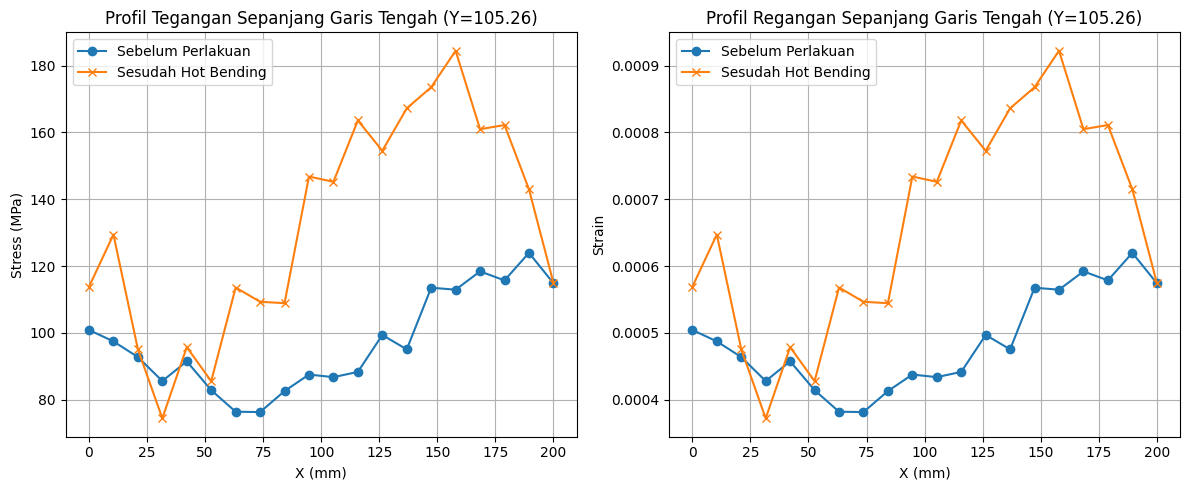

In [28]:
# === Bandingkan profil tegangan dan regangan 2D ===
# Pilih garis tengah pada Y konstan
y_middle_index = len(y) // 2
Y_middle = Y[y_middle_index, :]
X_line = X[y_middle_index, :]

# Ambil nilai tegangan dan regangan di sepanjang garis tengah
Z_before_line = Z_before[y_middle_index, :]
Z_after_line = Z_after[y_middle_index, :]
epsilon_before_line = epsilon_before[y_middle_index, :]
epsilon_after_line = epsilon_after[y_middle_index, :]

# Plotting profil tegangan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_line, Z_before_line, label='Sebelum Perlakuan', marker='o')
plt.plot(X_line, Z_after_line, label='Sesudah Hot Bending', marker='x')
plt.xlabel('X (mm)')
plt.ylabel('Stress (MPa)')
plt.title('Profil Tegangan Sepanjang Garis Tengah (Y={:.2f})'.format(Y_middle[0]))
plt.legend()
plt.grid(True)

# Plotting profil regangan
plt.subplot(1, 2, 2)
plt.plot(X_line, epsilon_before_line, label='Sebelum Perlakuan', marker='o')
plt.plot(X_line, epsilon_after_line, label='Sesudah Hot Bending', marker='x')
plt.xlabel('X (mm)')
plt.ylabel('Strain')
plt.title('Profil Regangan Sepanjang Garis Tengah (Y={:.2f})'.format(Y_middle[0]))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

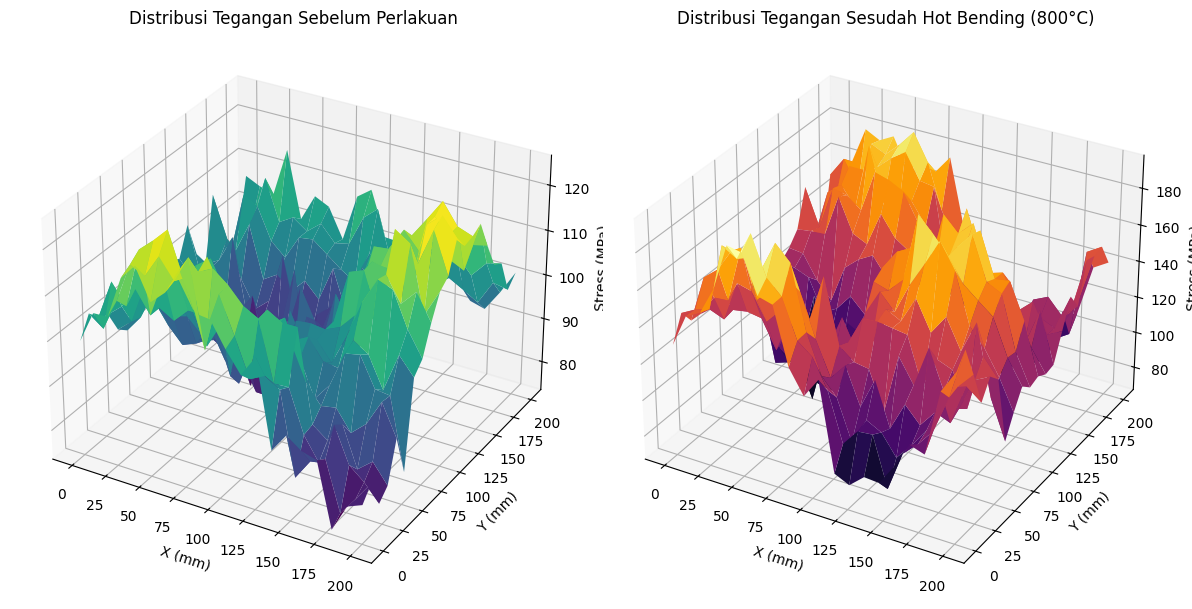

In [29]:
# === Plot hasil 3D ===
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_before, cmap='viridis')
ax1.set_title("Distribusi Tegangan Sebelum Perlakuan")
ax1.set_xlabel('X (mm)')
ax1.set_ylabel('Y (mm)')
ax1.set_zlabel('Stress (MPa)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_after, cmap='inferno')
ax2.set_title("Distribusi Tegangan Sesudah Hot Bending (800°C)")
ax2.set_xlabel('X (mm)')
ax2.set_ylabel('Y (mm)')
ax2.set_zlabel('Stress (MPa)')

plt.tight_layout()
plt.show()

1. Distribusi Tegangan dan Regangan Awal (Sebelum Perlakuan):
*   Sampel memiliki distribusi tegangan dan regangan awal yang relatif
*   lebih halus dan merata, dengan variasi yang kecil.
Nilai rata-rata tegangan dan regangan sebelum perlakuan lebih rendah dibandingkan sesudah perlakuan.

2. Perubahan Setelah Hot Bending (800°C):
*   Proses hot bending menyebabkan peningkatan signifikan pada tingkat tegangan dan regangan rata-rata dan maksimum di seluruh permukaan sampel.
*   Distribusi tegangan dan regangan menjadi lebih bervariasi dan tidak merata, ditandai dengan fluktuasi yang lebih besar, yang terlihat jelas pada plot 3D dan plot profil 2D.

3. Statistik Perbedaan:
*   Analisis perbedaan menunjukkan adanya kenaikan rata-rata tegangan sekitar {mean_stress_difference:.2f} MPa dan rata-rata regangan sekitar {mean_epsilon_difference:.6f}.
*   Terdapat rentang perbedaan tegangan dan regangan yang cukup lebar di seluruh permukaan, menunjukkan bahwa dampak hot bending bervariasi tergantung lokasi pada sampel.

**Kesimpulan:**

Simulasi ini menunjukkan bahwa perlakuan hot bending pada suhu 800°C memiliki dampak yang signifikan dalam meningkatkan dan mengubah distribusi tegangan dan regangan internal pada sampel besi. Peningkatan dan variasi ini merupakan hasil dari kombinasi deformasi plastis, efek termal, dan kemungkinan perubahan mikrostruktural yang terjadi selama proses.

Penting untuk diingat bahwa simulasi ini menggunakan model yang disederhanakan. Analisis dengan perangkat lunak teknik yang lebih canggih seperti StressVision Advanced akan memberikan hasil yang lebih akurat dan detail karena mempertimbangkan parameter material dan kondisi proses yang lebih kompleks.

PUSH KE GITHUB

In [87]:
# 1. Inisialisasi Git Repository
!git init

Reinitialized existing Git repository in /content/.git/


In [89]:
# 2. Konfigurasi Identitas Git
!git config --global user.email "dinda.h33@gmail.com"
!git config --global user.name "dindahanifa"

In [90]:
# 3. Tambahkan File
!git add .

In [91]:
# 4. Commit Perubahan
!git commit -m "Initial commit of notebook"

On branch main
nothing to commit, working tree clean
